In [1]:
using CovidSim

┌ Info: Precompiling CovidSim [top-level]
└ @ Base loading.jl:1260


In [4]:
seattle = (fips=53033, id=2); nyc=(fips=36061, id=3); bismarck=(fips=38015,id=10)

(fips = 38015, id = 10)

In [7]:
geo = CovidSim.readgeodata("../data/geo2data.csv")
geo[:,1:7]

15×7 Array{Any,2}:
  1   6075  "San Francisco"  "San Francisco"  "CA"  2   881549
  2  53033  "Seattle"        "Seattle"        "WA"  2  2252782
  3  36061  "New York"       "New York"       "NY"  1  5803210
  4  39035  "Cuyahoga"       "Cleveland"      "OH"  2  1235072
  5  48113  "Dallas"         "Dallas"         "TX"  2  2635516
  6  39151  "Stark"          "Canton"         "OH"  3   370606
  7  34013  "Essex"          "Newark"         "NJ"  3   798975
  8  13089  "DeKalb"         "Atlanta"        "GA"  2  1063937
  9  17167  "Sangamon"       "Springfield"    "IL"  3   194672
 10  38015  "Burleigh"       "Bismarck"       "ND"  3    95626
 11   4013  "Maricopa"       "Phoenix"        "AZ"  1  4485414
 12  42003  "Allegheny"      "Pittsburgh"     "PA"  2  1216045
 13  27053  "Hennepin"       "Minneapolis"    "MN"  2  1265843
 14  31055  "Douglas"        "Omaha"          "NE"  2   571327
 15   8031  "Denver"         "Denver"         "CO"  2   727211

In [47]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim.var"#scase#75"{CovidSim.var"#scase#74#76"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}}) (generic function with 1 method)

In [48]:
alldict, env, series = run_a_sim(180,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 2....
Simulation completed for 180 days.


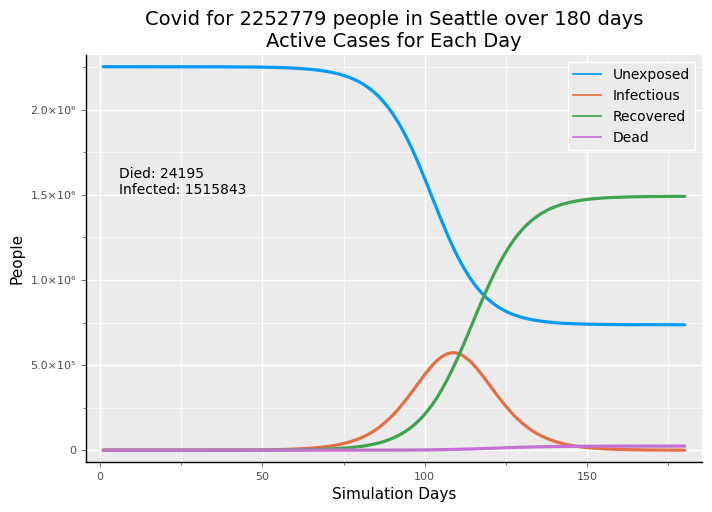

In [49]:
cumplot(series,seattle.id,geo=geo)

### Strong Social Distancing

In [ ]:
Reset the model to defaults.

In [61]:
alldict, env, series = run_a_sim(180,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 2....
Simulation completed for 180 days.


In [62]:
str_50 = sd_gen(start=50, comply=.8, cf=(.2,1.3), tf=(.18,.45))

(::CovidSim.var"#sd_mod#88"{CovidSim.var"#sd_mod#87#89"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [63]:
alldict, env, series = run_a_sim(180,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50],
       runcases=[seed_1_6]);

*** seed day 1 locale 2....
Simulation completed for 180 days.


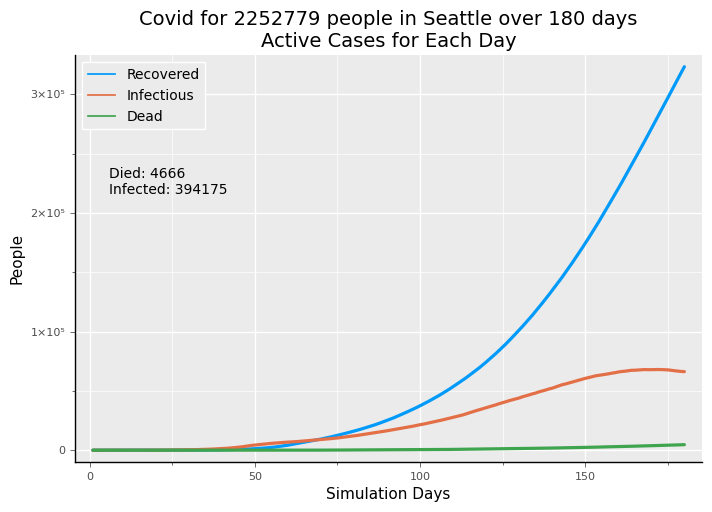

In [64]:
cumplot(series,seattle.id,[recovered, infectious, dead],geo=geo)

### Open Totally (which won't happen...)
This uses opening back to essentially no social distancing and an R0 between 1.9 and 2.0. People will voluntarily be more prudent and government recommendations and policies will provide for more limited opening. So, this shows why complete opening is't possible:  the full force of the virus does return with only a slight delay.

In [65]:
# Reset to defaults
alldict, env, series = run_a_sim(180,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 2....
Simulation completed for 180 days.


In [66]:
open = sd_gen(start=105, comply=0.0, cf=(.3,1.8), tf=(.18,.62))

(::CovidSim.var"#sd_mod#88"{CovidSim.var"#sd_mod#87#89"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [67]:
alldict, env, series = run_a_sim(180,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50, open],
       runcases=[seed_1_6]);

*** seed day 1 locale 2....
Simulation completed for 180 days.


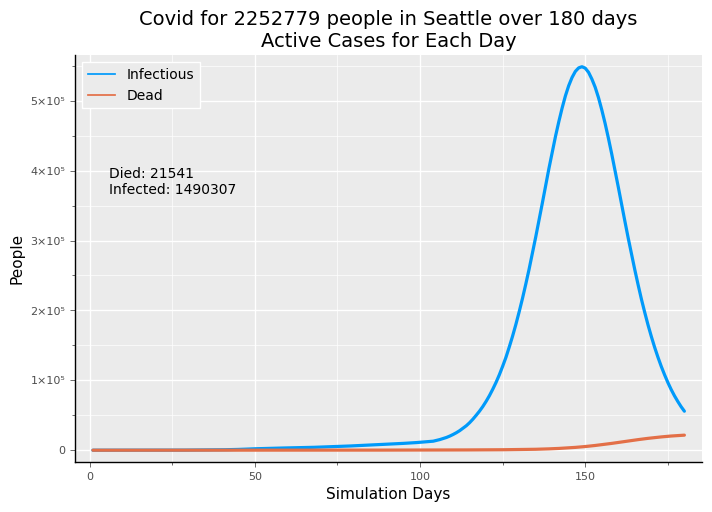

In [68]:
cumplot(series,seattle.id,[infectious, dead],geo=geo)

In [69]:
r0_sim(;sa_pct=[1.0,0.0,0.0], density_factor=1.0, dt=[], cf=[], tf=[],
                compliance=[1.0], shift_contact=(.2,1.8), shift_touch=(.18,.62), pri=false)

(r0 = 1.9208333333333334, spreaders = 480, contacts = 485, touched = 276, infected = 922)

The preceding estimates R0 based on equal representation in all demographic groups of the simulation.  But, the groups are not equally respresented so this is a slight underestimate of the socially determined R0.

### Limited Opening

In [70]:
# reset the model to defaults
alldict, env, series = run_a_sim(180,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 2....
Simulation completed for 180 days.


In [71]:
mod_105 = sd_gen(start=105,cf=(.2,1.45), tf=(.18,.5),comply=.7)

(::CovidSim.var"#sd_mod#88"{CovidSim.var"#sd_mod#87#89"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [72]:
r0_sim(;sa_pct=[1.0,0.0,0.0], density_factor=1.0, dt=[], cf=[], tf=[],
                compliance=[.75], shift_contact=(.2,1.45), shift_touch=(.18,.5), pri=false)

(r0 = 1.1708333333333334, spreaders = 480, contacts = 361, touched = 160, infected = 562)

In [73]:
alldict, env, series = run_a_sim(180,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50, mod_105],
       runcases=[seed_1_6]);

*** seed day 1 locale 2....
Simulation completed for 180 days.


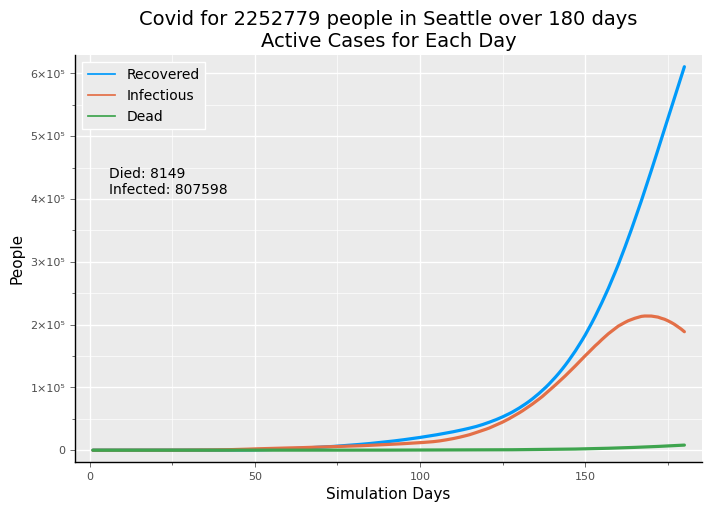

In [74]:
cumplot(series,seattle.id,[recovered,infectious, dead],geo=geo)

Even with meaningful easing or restrictions, this moderate opening is very effective because it comes on the base of a lower curve that resulted from earlier strict social distancing.

This alternative would *not* be recommended. Widespread testing of asymptomatic people with contact tracing is very hard to achieve, but is a preferred alternative.  (Modeling effort is more significant: it is coming.)

### An Alternative: Fewer Restrictions with Isolation of the Vulnerable
Note that this cases models vulnerable people as the age groups from 60 to 80 and over 80. Other people are vulnerable: people with diabetes, hypertension, immuno-compromise, cancer patients, smokers, and others across age groups. It's beyond this model to attempt to represent these vulnerabilities across age groups at this poing.

In [75]:
mod_less_105 = sd_gen(start=105,cf=(.2,1.55), tf=(.18,.52),comply=.55)

(::CovidSim.var"#sd_mod#88"{CovidSim.var"#sd_mod#87#89"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [76]:
r0_sim(;sa_pct=[1.0,0.0,0.0], density_factor=1.0, dt=[], cf=[], tf=[],
                compliance=[.65], shift_contact=(.2,1.55), shift_touch=(.18,.55), pri=false)

(r0 = 1.46875, spreaders = 480, contacts = 369, touched = 176, infected = 705)

In [77]:
function isolate_vulnerable(locale; opendat=openmx, isodat=isolatedmx, env=env)
    if ctr[:day] == 105
        isolate!(.70,[unexposed, nil,mild,sick, severe],[5],1:laglim, locale; opendat=opendat, isodat=isodat)
        isolate!(.50,[unexposed,nil,mild,sick, severe],[4],1:laglim, locale; opendat=opendat, isodat=isodat)
    end
end

isolate_vulnerable (generic function with 1 method)

In [81]:
# reset the model to defaults
alldict, env, series = run_a_sim(180,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[]);
laglim=25

*** seed day 1 locale 2....
Simulation completed for 180 days.


25

In [83]:
alldict, env, series = run_a_sim(180,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50, mod_less_105],
       runcases=[seed_1_6, isolate_vulnerable]);

*** seed day 1 locale 2....
Simulation completed for 180 days.


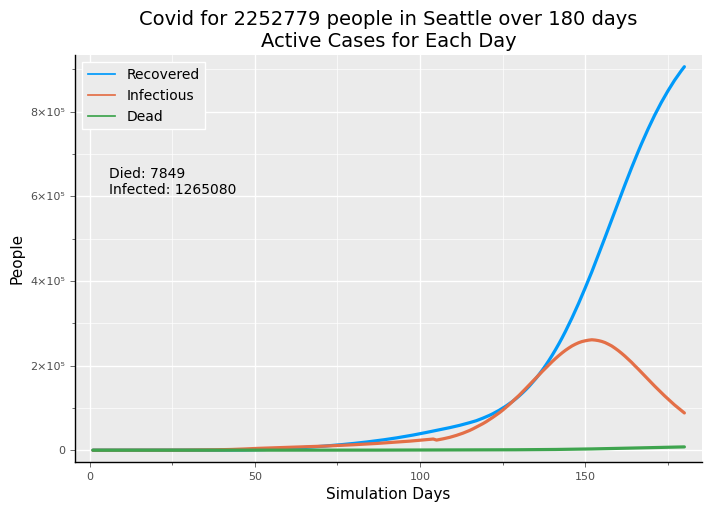

In [84]:
cumplot(series,seattle.id,[recovered,infectious, dead],geo=geo)

**Assessment:**
This was put together quickly and requires more careful review. The restrictions are considerably looser than the limited opening above, which is clear from the high infection rate. But, the number of deaths is lower. Since over 75% of deaths occur in agegroups over 60 combined with over 80, the moderation of deaths will primarily benefit those age groups. This warrants more work.